In [1]:
from datasets import load_dataset

ds = load_dataset("Adelante/Al-Ahram-raw")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/10852 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to C:/Users/Chen Qun/.cache/huggingface/datasets/Adelante___parquet/Adelante--Al-Ahram-raw-b0a2d836a20234f5/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['year', 'month', 'date', 'page', 'text'],
        num_rows: 10852
    })
})

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Windows系统的默认字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题


# 假设你的数据集是一个包含文本列的 DataFrame

data = pd.DataFrame(ds['train'])


# 计算每段文本的长度
data['text_length'] = data['text'].apply(len)

# 计算文本长度大于 10000 的占比
threshold = 10000
percentage_above_threshold = (data['text_length'] > threshold).mean() * 100


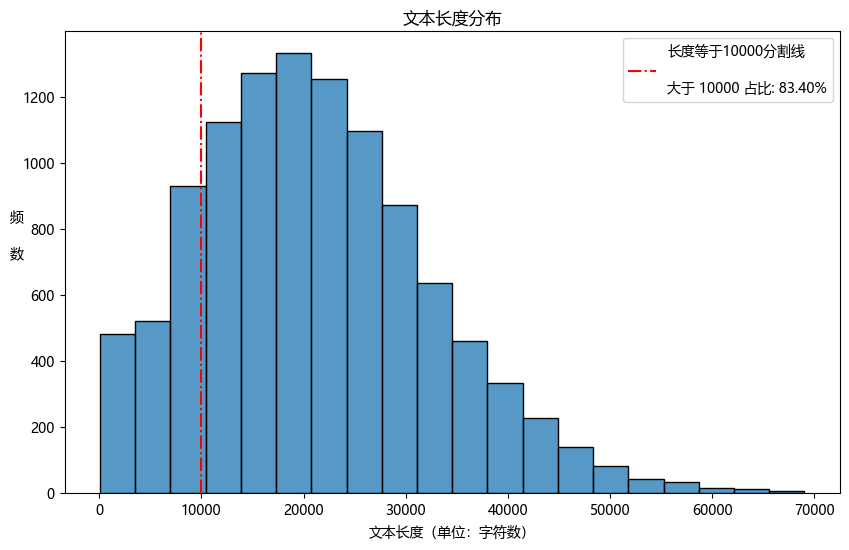

In [24]:
# 使用 seaborn 绘制文本长度的直方图
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], kde=False, bins=20)

# 添加标记阈值的垂直线
plt.axvline(threshold, color='red', linestyle='-.', label=f'长度等于{threshold}分割线\n\n大于 {threshold} 占比: {percentage_above_threshold:.2f}%')

# 在图中显示占比信息
#plt.text(threshold + 500, plt.gca().get_ylim()[1] * 0.8,
#         f'Above {threshold}: {percentage_above_threshold:.2f}%', color='red')

# 添加标题和标签
plt.title('文本长度分布')
plt.xlabel('文本长度（单位：字符数）')
plt.ylabel('频\n\n数', rotation=0)

plt.legend()

plt.show()

---

# Vis For Ablation 

In [ ]:
from datasets import load_dataset

ds = load_dataset("Adelante/sentiment_analysis_v1")


In [26]:
ds

DatasetDict({
    train: Dataset({
        features: ['year', 'month', 'date', 'page', 'slice', 'text', 'containing', 'sentiment_label_numerical', 'sentiment_label'],
        num_rows: 28240
    })
})

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假设你的数据集是一个DataFrame，每一行代表一个样本，标签存储在 'label' 列中
data = pd.DataFrame({
    "label":ds['train']['sentiment_label']
})

data


,label
0,相对满意
1,相对满意
2,相对不满
3,相对满意
4,相对不满
...,...
28235,相对不满
28236,相对不满
28237,相对不满
28238,相对不满


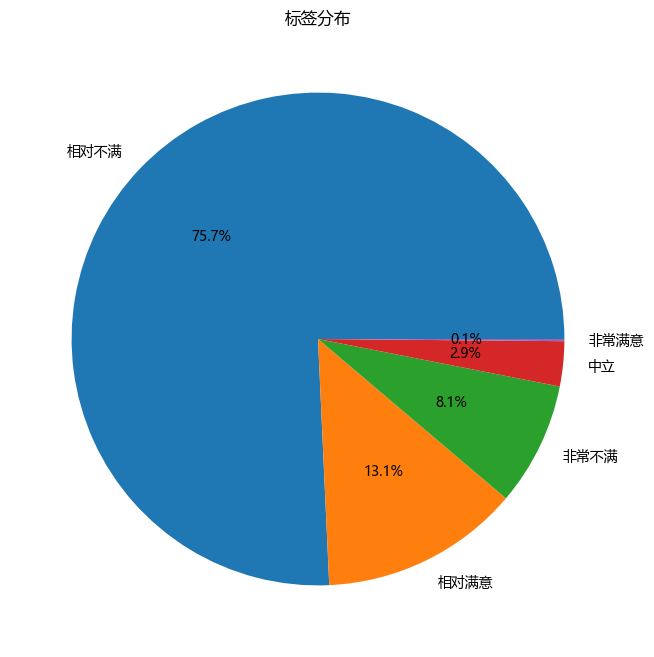

In [46]:
# 计算每个标签的数量
label_counts = data.value_counts()

# 设置图形的默认字体（假设你想用系统默认的中文字体）
plt.rcParams['font.family'] = 'Microsoft YaHei'  # Windows系统的默认字体是'Microsoft YaHei'




plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=[str(index[0]) for index in label_counts.index], autopct='%1.1f%%')
plt.title('标签分布')
plt.show()

In [45]:
[str(index[0]) for index in label_counts.index]

['相对不满', '相对满意', '非常不满', '中立', '非常满意']

In [47]:
from datasets import load_dataset

ds = load_dataset("Adelante/arabic-qa-largebatch")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/28240 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to C:/Users/Chen Qun/.cache/huggingface/datasets/Adelante___parquet/Adelante--arabic-qa-largebatch-4d8c6dd60ea2820d/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
ds

DatasetDict({
    train: Dataset({
        features: ['year', 'month', 'date', 'page', 'slice', 'text', 'containing', '问题1-数字', '问题2-数字', '问题3-数字', '问题4-数字', '问题5-数字', '问题6-数字', '问题7-数字', '问题8-数字', '问题9-数字', '问题1-文字', '问题2-文字', '问题3-文字', '问题4-文字', '问题5-文字', '问题6-文字', '问题7-文字', '问题8-文字', '问题9-文字'],
        num_rows: 28240
    })
})

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假设你的数据集是一个DataFrame，每一行代表一个样本，标签存储在 'label' 列中
data = pd.DataFrame({
    "label":ds['train']['问题1-文字']
})

# 排除掉标签为'E'的数据
data_filtered = data[data['label'] != 0]

# 计算每个标签的数量（过滤后的数据）
label_counts = data_filtered['label'].value_counts()


data


,label
0,中立
1,中度负面
2,中度负面
3,中度负面
4,中立
...,...
28235,极其负面
28236,中度负面
28237,中度负面
28238,中度负面


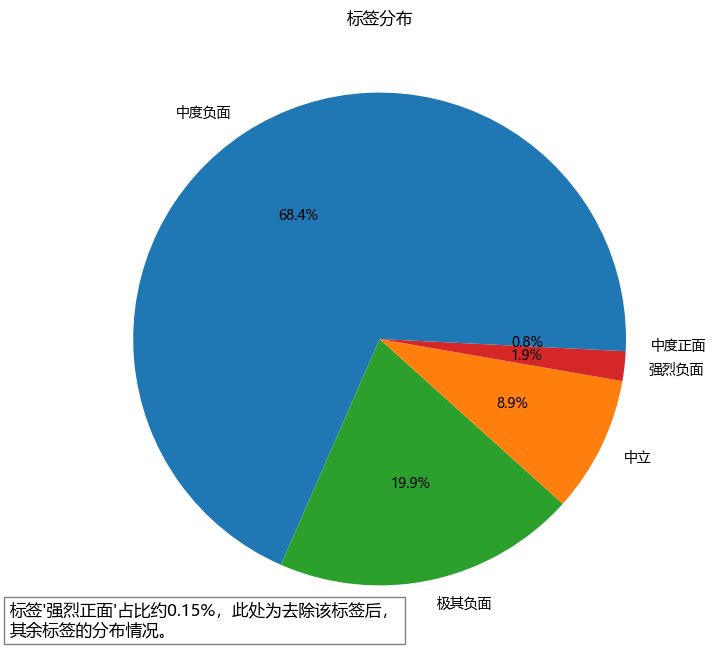

In [79]:
# 计算每个标签的数量
label_counts = data.value_counts()

label_counts = label_counts[:-2]
# 设置图形的默认字体（假设你想用系统默认的中文字体）
plt.rcParams['font.family'] = 'Microsoft YaHei'  # Windows系统的默认字体是'Microsoft YaHei'

# 手动定义颜色列表，每个颜色对应一个标签
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']  # 示例颜色，顺序对应标签A, B, C, D




plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=[str(index[0]) for index in label_counts.index], autopct='%1.1f%%', colors=colors)
text = "标签'强烈正面'占比约0.15%，此处为去除该标签后，\n其余标签的分布情况。"
plt.text(-1.5, -1.2, text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.title('标签分布')
plt.show()

In [74]:
data.value_counts()

label
中度负面     19295
极其负面      5608
中立        2518
强烈负面       549
中度正面       222
强烈正面        45
0            3
Name: count, dtype: int64